In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

Training Set

60000 images
Each image is of the shape 28 x 28 (rows x columns)
60000 labels defining the digit that corresponds to the respective image

Test Set

10000 images
Each image is of the shape 28 x 28 (rows x columns)
10000 labels defining the digit that corresponds to the respective image
Dataset Visualization.
we also visualize the handwritten digit images and labels for 0th training sample. We can see that the 0th image shows a handwritten 5 and the 0th label has the value 5.

In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.gray()

<Figure size 640x480 with 0 Axes>

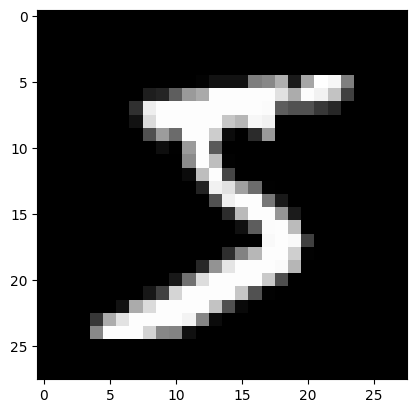

In [9]:
plt.imshow(train_images[0])

In [10]:
train_labels[0]

5

Define the model
Input Shape: Column Vector corresponding to 28x28 image matrix for the digit = 784 rows,1 column = 784,1
1st hidden layer: Number of neurons = 512
1st hidden layer: Activation Function = relu (for non-linearity detection)
Output layer: Number of neurons = 10 (corresponding to 0 to 9 digits)
Output layer: Activation Function = softmax (to get probabilities for the repective 10 classes)

In [11]:
from keras import models

In [12]:
from keras import layers

In [13]:
model_mlp = models.Sequential()

In [14]:
model_mlp.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_mlp.add(layers.Dense(10, activation='softmax'))

In [16]:
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

<b>Define the optimizer function, loss function and metrics to be used for the model.</b>

In [17]:
model_mlp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We will preprocess the data before feeding it to the model:


1.   Change the images to column vector form: 28x28 -> 784x1 to match to model's input expectations
2.   Change the vector values from int to float: to get continuos values as we move thro's model's layers
3.Scale the vector values to be in the [0,1] interval: model will see all samples with equal weightage as the range of values for all samples are same.

Note: gray scale values will be from 0 to 255... hence dividing the float by 255 will give us the values in [0,1] interval



In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_images_mlp = train_images.reshape(60000, 28*28)

In [20]:
train_images_mlp.shape

(60000, 784)

In [21]:
type(train_images_mlp[0][350])

numpy.uint8

In [22]:
train_images_mlp[0][350]

70

In [23]:
train_images_mlp = train_images_mlp.astype('float32') / 255

In [24]:
# type has changed to float
type(train_images_mlp[0][350])

numpy.float32

In [25]:
train_images_mlp[0][350]

0.27450982

In [26]:
70/255

0.27450980392156865

<b>Data Preprocessing - Test Images</b>

In [27]:
test_images_mlp = test_images.reshape(10000,28*28)

In [28]:
test_images_mlp = test_images_mlp.astype('float32') / 255

<b>Data Preprocessing - Train Labels</b>

In [29]:
train_labels[0]

5

In [30]:
from keras.utils import to_categorical

In [31]:
train_labels_mlp = to_categorical(train_labels)

In [32]:
train_labels_mlp[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [33]:
test_labels_mlp = to_categorical(test_labels)

Train the Model
We will now train the model using train images and train labels.

We will use a batch size = 120.
1 epoch = 60000 / 120 = 500 batches
1 epoch = 1 complete run of all train samples for training the model
We will go for a total of 5 epochs = 5 complete run of the all train samples

In [34]:
model_mlp.fit(train_images_mlp, train_labels_mlp, epochs = 5, batch_size = 120)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8747 - loss: 0.4336
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9656 - loss: 0.1173
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9782 - loss: 0.0751
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9843 - loss: 0.0528
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9881 - loss: 0.0364


at this run, we got a training accuracy of ~98.9%

Test the Model
We will now test model's performance with the test data.

We predict the class for each of the 10000 test using the model.
We will check the test accuracy.

In [35]:

test_loss_mlp, test_acc_mlp = model_mlp.evaluate(test_images_mlp, test_labels_mlp)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.0791


In [36]:
print('test accuracy:', (test_acc_mlp*100))

test accuracy: 98.1000006198883


<b>CNN based solution</b>

In [37]:
from keras import models

In [38]:
from keras import layers

In [39]:
model_cnn = models.Sequential()

Layer Details:

2 dimensional Convolution Layer
Number of filters/kernels = 32
Filter/Kernel Size = 3x3
Activation Function = relu (for non-linearity detection)
Input Shape = 28x28 matrix with 1 channel (as image is gray scale, we have only 1 channel)

In [40]:
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Layer Details:

Downsample the output from previous layer
We will take the max value for a every 2x2 window ... moved over the input

In [41]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:

2 dimensional Convolution Layer
Number of filters/kernels = 64
Filter/Kernel Size = 3x3
Activation Function = relu (for non-linearity detection)

In [42]:
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

Layer Details:

Downsample the output from previous layer
We will take the max value for a every 2x2 window ... moved over the input

In [43]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:

2 dimensional Convolution Layer
Number of filters/kernels = 64
Filter/Kernel Size = 3x3
Activation Function = relu (for non-linearity detection)

In [44]:
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

In [45]:
model_cnn.add(layers.Flatten())

In [46]:
model_cnn.add(layers.Dense(64, activation = 'relu'))

In [47]:
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [48]:
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Data Preprocessing - Train and Test Images

In [49]:
train_images.shape

(60000, 28, 28)

CNN needs another dimension for the channel. Here as the image is gray scale it will be 1 channel. If we had color images, the channel value would have been 3 for the three channels - Red, Green and Blue.

In [50]:
train_images_cnn = train_images.reshape(60000, 28, 28, 1)

In [51]:
train_images_cnn.shape

(60000, 28, 28, 1)

We need to change the element values from integer to decimal to have continuos values during prediction through the various layers. We will limit the values to the interval [0,1] so that the model treats each sample with equal weightage as the range of values for all samples will be fixed. We will do this by dividing the decimal values by 255 (gray scale values are from 0 to 255 ... 0 representing black to white).

In [52]:
train_images_cnn = train_images_cnn.astype('float32') / 255

In [53]:
test_images_cnn = test_images.reshape(10000, 28, 28, 1)

In [54]:
test_images_cnn = test_images_cnn.astype('float32') / 255

Data Preprocessing - Train and Test Labels
We will convert the labels to 10bit values. Only 1 of the bits of the 10bit value will be 1 corresponding to the location for the respective digit and rest all bits will be 0. This is required to match to the model's output layer expectation so that we can effectively train and test.

In [55]:
from keras.utils import to_categorical

In [56]:
train_labels_cnn = to_categorical(train_labels)

In [57]:
test_labels_cnn = to_categorical(test_labels)

In [58]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Train the Model.
We will now train the model using train images and train labels.
We will use a batch size = 60.
1 epoch = 60000 / 60 = 1000 batches
1 epoch = 1 complete run of all train samples for training the model
We will go for a total of 5 epochs = 5 complete run of the all train samples

In [59]:
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 5, batch_size = 60)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 52s 51ms/step - accuracy: 0.8770 - loss: 0.3807
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.9845 - loss: 0.0503
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9904 - loss: 0.0301
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 48s 48ms/step - accuracy: 0.9928 - loss: 0.0219
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9945 - loss: 0.0185


At this run, we got a training accuracy of ~99.4%

Test the Model
We will now test model's performance with the test data.

We predict the class for each of the 10000 test using the model.
We will check the test accuracy.

In [60]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9906 - loss: 0.0323


In [61]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.2900013923645


At this run, we got a training accuracy of **~99.3%**